In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import tarfile
from six.moves import urllib

import pandas as pd

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

print (HOUSING_URL)
print (HOUSING_PATH)
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
datasets/housing


In [3]:
fetch_housing_data()
housing = pd.read_csv("datasets/housing/housing.csv")
print (housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print( "\nTraining Percentages:\n" )
print(train_set.count()/housing.count())


Training Percentages:

longitude             0.800000
latitude              0.800000
housing_median_age    0.800000
total_rooms           0.800000
total_bedrooms        0.808105
population            0.800000
households            0.800000
median_income         0.800000
median_house_value    0.800000
ocean_proximity       0.800000
dtype: float64


In [5]:
housing_labels = train_set["median_house_value"].copy()
print (housing_labels.describe())

housing_m = housing["median_income"].copy()
print(type(housing_m))
print (housing_m.describe())

count     16512.000000
mean     207194.693738
std      115622.626448
min       14999.000000
25%      119800.000000
50%      179850.000000
75%      265125.000000
max      500001.000000
Name: median_house_value, dtype: float64
<class 'pandas.core.series.Series'>
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()
housing_m = housing["median_income"].copy()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

det_reg = DecisionTreeRegressor(min_samples_leaf=100)
#det_reg = DecisionTreeRegressor()
lin_reg = LinearRegression()
train_m=housing_m.values
train_m=train_m.reshape(-1,1)
print(train_m.shape)
train_labels=housing_labels.values
lin_reg.fit(train_m, train_labels)

det_reg.fit(train_m, train_labels)

(16512, 1)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
from sklearn.metrics import mean_squared_error

housing_test = test_set.drop("median_house_value", axis=1) # drop labels for training set
housing_test_labels = test_set["median_house_value"].copy()

housing_test_m = housing_test["median_income"].values.reshape(-1,1)

housing_test_m.sort()
lin_housing_predictions = lin_reg.predict(housing_test_m)
lin_mse = mean_squared_error(housing_test_labels, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)

det_housing_predictions = det_reg.predict(housing_test_m)
det_mse = mean_squared_error(housing_test_labels, det_housing_predictions)
det_rmse = np.sqrt(det_mse)
print(det_rmse)

print(lin_rmse)

83780.21035412213
84209.01241414454


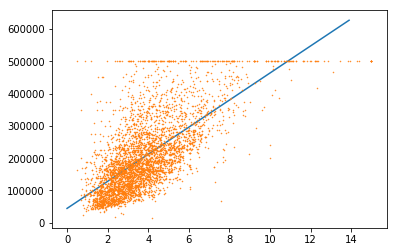

In [10]:
x = np.arange(0,14,0.1)
x = x.reshape(-1,1)
det_housing_predictions = lin_reg.predict(x)
plt.plot(x, det_housing_predictions, "-")
plt.plot(housing_test_m, housing_test_labels,".",markersize =1)
plt.show()